# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-04-24 14:54:47--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  33.9MB/s    in 2.4s    

2024-04-24 14:54:49 (33.9 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 392: /usr/local/conda.exe: Permission denied
chmod: cannot access '/usr/local/conda.exe': No such file or directory
Unpacking payload ...
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 404: /usr/local/conda.exe: No such file or directory
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 406: /usr/local/conda.exe: No such fi

Retrieving notices: ...working... done
Channels:
 - rdkit
 - defaults
Platform: linux-64
Solving environment: | warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE
failed

LibMambaUnsatisfiableError: Encountered problems while solving:
  - nothing provides numpy 1.8* needed by rdkit-2014.03.1-np18py27_3

Could not solve for environment specs
The following packages are incompatible
├─ pin-1 is installable and it requires
│  └─ python 3.12.* , which can be installed;
└─ rdkit is not installable because there are no viable options
   ├─ rdkit 2014.03.1 would require
   │  └─ numpy 1.8* , which does not exist (perhaps a missing channel);
   ├─ rdkit 2014.09.1 would require
   │  └─ python 2.6* , which does not exist (perhaps a missing channel);
   ├─ rdkit [2014.09.1|2014.09.2|...|2018.09.3.0] would require
   │  └─ python [2.7* |>=2.7,<2.8.0a0 ], which conflicts with any installable versions previously reported;
   ├─ rdkit [2014.09.1|2014.09.2|...|2016.03.4] woul

## **Load bioactivity data**

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('MgluR5_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,36.0,active
1,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,3000.0,intermediate
2,CHEMBL2112677,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1,10.0,active
3,CHEMBL39338,N[C@@H](C[C@H](CCCC(c1ccccc1)c1ccccc1)C(=O)O)C...,300000.0,inactive
4,CHEMBL40123,N[C@@H](C[C@H](CC(c1ccccc1)c1ccccc1)C(=O)O)C(=O)O,300000.0,inactive
...,...,...,...,...
1967,CHEMBL4591221,CC(C)(C)c1cc2n(n1)CCN(C(=O)c1ccc3ccccc3c1)C2,477.0,active
1968,CHEMBL4572894,O=C1N[C@H](c2cncc(C#Cc3ccccc3)c2)[C@@H](c2c(F)...,27.0,active
1969,CHEMBL1527295,CCOC(=O)c1cnc2c(OC)cccc2c1N1CCN(c2ccccc2F)CC1,30000.0,inactive
1970,CHEMBL4751065,Cl.N[C@]1(C(=O)O)[C@@H]2[C@@H](C(=O)O)[C@@H]2[...,12500.0,inactive


In [4]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [5]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [6]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL66654,36.0,active,Cc1cccc(C#Cc2ccccc2)n1
1,CHEMBL88612,3000.0,intermediate,Cc1cccc(/C=C/c2ccccc2)n1
2,CHEMBL2112677,10.0,active,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1
3,CHEMBL39338,300000.0,inactive,N[C@@H](C[C@H](CCCC(c1ccccc1)c1ccccc1)C(=O)O)C...
4,CHEMBL40123,300000.0,inactive,N[C@@H](C[C@H](CC(c1ccccc1)c1ccccc1)C(=O)O)C(=O)O
...,...,...,...,...
1967,CHEMBL4591221,477.0,active,CC(C)(C)c1cc2n(n1)CCN(C(=O)c1ccc3ccccc3c1)C2
1968,CHEMBL4572894,27.0,active,O=C1N[C@H](c2cncc(C#Cc3ccccc3)c2)[C@@H](c2c(F)...
1969,CHEMBL1527295,30000.0,inactive,CCOC(=O)c1cnc2c(OC)cccc2c1N1CCN(c2ccccc2F)CC1
1970,CHEMBL4751065,12500.0,inactive,N[C@]1(C(=O)O)[C@@H]2[C@@H](C(=O)O)[C@@H]2[C@H...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [8]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 20.6 MB/s eta 0:00:0000:0100:01


In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [10]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [11]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,193.249000,2.78982,0.0,1.0
1,195.265000,3.56042,0.0,1.0
2,243.326148,2.93622,0.0,2.0
3,355.434000,3.49160,3.0,3.0
4,327.380000,2.71140,3.0,3.0
...,...,...,...,...
1967,333.435000,3.98980,0.0,3.0
1968,376.362000,4.28180,1.0,3.0
1969,409.461000,3.88580,0.0,6.0
1970,359.350000,0.77650,4.0,5.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [12]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,193.249000,2.78982,0.0,1.0
1,195.265000,3.56042,0.0,1.0
2,243.326148,2.93622,0.0,2.0
3,355.434000,3.49160,3.0,3.0
4,327.380000,2.71140,3.0,3.0
...,...,...,...,...
1967,333.435000,3.98980,0.0,3.0
1968,376.362000,4.28180,1.0,3.0
1969,409.461000,3.88580,0.0,6.0
1970,359.350000,0.77650,4.0,5.0


In [13]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,36.0,active
1,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,3000.0,intermediate
2,CHEMBL2112677,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1,10.0,active
3,CHEMBL39338,N[C@@H](C[C@H](CCCC(c1ccccc1)c1ccccc1)C(=O)O)C...,300000.0,inactive
4,CHEMBL40123,N[C@@H](C[C@H](CC(c1ccccc1)c1ccccc1)C(=O)O)C(=O)O,300000.0,inactive
...,...,...,...,...
1967,CHEMBL4591221,CC(C)(C)c1cc2n(n1)CCN(C(=O)c1ccc3ccccc3c1)C2,477.0,active
1968,CHEMBL4572894,O=C1N[C@H](c2cncc(C#Cc3ccccc3)c2)[C@@H](c2c(F)...,27.0,active
1969,CHEMBL1527295,CCOC(=O)c1cnc2c(OC)cccc2c1N1CCN(c2ccccc2F)CC1,30000.0,inactive
1970,CHEMBL4751065,Cl.N[C@]1(C(=O)O)[C@@H]2[C@@H](C(=O)O)[C@@H]2[...,12500.0,inactive


Now, let's combine the 2 DataFrame

In [14]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [15]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,36.0,active,193.249000,2.78982,0.0,1.0
1,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,3000.0,intermediate,195.265000,3.56042,0.0,1.0
2,CHEMBL2112677,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1,10.0,active,243.326148,2.93622,0.0,2.0
3,CHEMBL39338,N[C@@H](C[C@H](CCCC(c1ccccc1)c1ccccc1)C(=O)O)C...,300000.0,inactive,355.434000,3.49160,3.0,3.0
4,CHEMBL40123,N[C@@H](C[C@H](CC(c1ccccc1)c1ccccc1)C(=O)O)C(=O)O,300000.0,inactive,327.380000,2.71140,3.0,3.0
...,...,...,...,...,...,...,...,...
1967,CHEMBL4591221,CC(C)(C)c1cc2n(n1)CCN(C(=O)c1ccc3ccccc3c1)C2,477.0,active,333.435000,3.98980,0.0,3.0
1968,CHEMBL4572894,O=C1N[C@H](c2cncc(C#Cc3ccccc3)c2)[C@@H](c2c(F)...,27.0,active,376.362000,4.28180,1.0,3.0
1969,CHEMBL1527295,CCOC(=O)c1cnc2c(OC)cccc2c1N1CCN(c2ccccc2F)CC1,30000.0,inactive,409.461000,3.88580,0.0,6.0
1970,CHEMBL4751065,Cl.N[C@]1(C(=O)O)[C@@H]2[C@@H](C(=O)O)[C@@H]2[...,12500.0,inactive,359.350000,0.77650,4.0,5.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [16]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [17]:
df_combined.standard_value.describe()

count    1.972000e+03
mean     1.517794e+04
std      2.290798e+05
min      3.200000e-01
25%      6.310000e+01
50%      4.410000e+02
75%      3.555000e+03
max      1.000000e+07
Name: standard_value, dtype: float64

In [18]:
-np.log10( (10**-9)* 100000000 )

1.0

In [19]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [26]:
def pIC50(input):
    pIC50 = []

    for molar in input['standard_value_norm']:
        molar = float(molar)
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)  # Fixed the drop function call

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [27]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,active,193.249000,2.78982,0.0,1.0,36.0
1,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,intermediate,195.265000,3.56042,0.0,1.0,3000.0
2,CHEMBL2112677,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1,active,243.326148,2.93622,0.0,2.0,10.0
3,CHEMBL39338,N[C@@H](C[C@H](CCCC(c1ccccc1)c1ccccc1)C(=O)O)C...,inactive,355.434000,3.49160,3.0,3.0,300000.0
4,CHEMBL40123,N[C@@H](C[C@H](CC(c1ccccc1)c1ccccc1)C(=O)O)C(=O)O,inactive,327.380000,2.71140,3.0,3.0,300000.0
...,...,...,...,...,...,...,...,...
1967,CHEMBL4591221,CC(C)(C)c1cc2n(n1)CCN(C(=O)c1ccc3ccccc3c1)C2,active,333.435000,3.98980,0.0,3.0,477.0
1968,CHEMBL4572894,O=C1N[C@H](c2cncc(C#Cc3ccccc3)c2)[C@@H](c2c(F)...,active,376.362000,4.28180,1.0,3.0,27.0
1969,CHEMBL1527295,CCOC(=O)c1cnc2c(OC)cccc2c1N1CCN(c2ccccc2F)CC1,inactive,409.461000,3.88580,0.0,6.0,30000.0
1970,CHEMBL4751065,Cl.N[C@]1(C(=O)O)[C@@H]2[C@@H](C(=O)O)[C@@H]2[...,inactive,359.350000,0.77650,4.0,5.0,12500.0


In [28]:
df_norm.standard_value_norm.describe()

count    1.972000e+03
mean     1.517794e+04
std      2.290798e+05
min      3.200000e-01
25%      6.310000e+01
50%      4.410000e+02
75%      3.555000e+03
max      1.000000e+07
Name: standard_value_norm, dtype: float64

In [29]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,active,193.249000,2.78982,0.0,1.0,-1.556303
1,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,intermediate,195.265000,3.56042,0.0,1.0,-3.477121
2,CHEMBL2112677,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1,active,243.326148,2.93622,0.0,2.0,-1.000000
3,CHEMBL39338,N[C@@H](C[C@H](CCCC(c1ccccc1)c1ccccc1)C(=O)O)C...,inactive,355.434000,3.49160,3.0,3.0,-5.477121
4,CHEMBL40123,N[C@@H](C[C@H](CC(c1ccccc1)c1ccccc1)C(=O)O)C(=O)O,inactive,327.380000,2.71140,3.0,3.0,-5.477121
...,...,...,...,...,...,...,...,...
1967,CHEMBL4591221,CC(C)(C)c1cc2n(n1)CCN(C(=O)c1ccc3ccccc3c1)C2,active,333.435000,3.98980,0.0,3.0,-2.678518
1968,CHEMBL4572894,O=C1N[C@H](c2cncc(C#Cc3ccccc3)c2)[C@@H](c2c(F)...,active,376.362000,4.28180,1.0,3.0,-1.431364
1969,CHEMBL1527295,CCOC(=O)c1cnc2c(OC)cccc2c1N1CCN(c2ccccc2F)CC1,inactive,409.461000,3.88580,0.0,6.0,-4.477121
1970,CHEMBL4751065,Cl.N[C@]1(C(=O)O)[C@@H]2[C@@H](C(=O)O)[C@@H]2[...,inactive,359.350000,0.77650,4.0,5.0,-4.096910


In [30]:
df_final.pIC50.describe()

count    1972.000000
mean       -2.669252
std         1.189510
min        -7.000000
25%        -3.550828
50%        -2.644437
75%        -1.800029
max         0.494850
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [31]:
df_final.to_csv('MgluR5_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [32]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,active,193.249000,2.78982,0.0,1.0,-1.556303
2,CHEMBL2112677,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1,active,243.326148,2.93622,0.0,2.0,-1.000000
3,CHEMBL39338,N[C@@H](C[C@H](CCCC(c1ccccc1)c1ccccc1)C(=O)O)C...,inactive,355.434000,3.49160,3.0,3.0,-5.477121
4,CHEMBL40123,N[C@@H](C[C@H](CC(c1ccccc1)c1ccccc1)C(=O)O)C(=O)O,inactive,327.380000,2.71140,3.0,3.0,-5.477121
5,CHEMBL97574,C[C@@H]1[C@H](C(=O)O)[C@H]1C(N)(CC1c2ccccc2Oc2...,inactive,367.401000,3.06310,3.0,4.0,-5.000000
...,...,...,...,...,...,...,...,...
1967,CHEMBL4591221,CC(C)(C)c1cc2n(n1)CCN(C(=O)c1ccc3ccccc3c1)C2,active,333.435000,3.98980,0.0,3.0,-2.678518
1968,CHEMBL4572894,O=C1N[C@H](c2cncc(C#Cc3ccccc3)c2)[C@@H](c2c(F)...,active,376.362000,4.28180,1.0,3.0,-1.431364
1969,CHEMBL1527295,CCOC(=O)c1cnc2c(OC)cccc2c1N1CCN(c2ccccc2F)CC1,inactive,409.461000,3.88580,0.0,6.0,-4.477121
1970,CHEMBL4751065,Cl.N[C@]1(C(=O)O)[C@@H]2[C@@H](C(=O)O)[C@@H]2[...,inactive,359.350000,0.77650,4.0,5.0,-4.096910


Let's write this to CSV file.

In [33]:
df_2class.to_csv('MgluR5_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [34]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

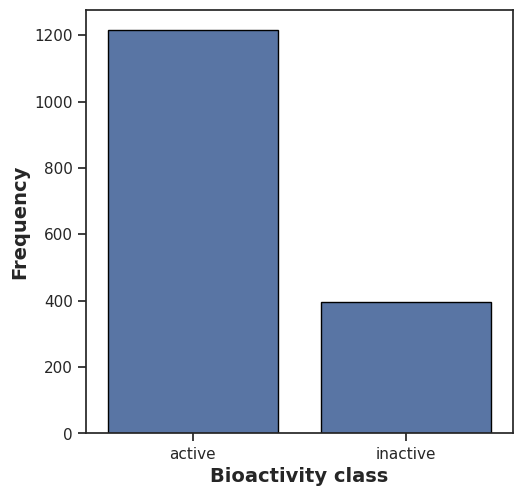

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

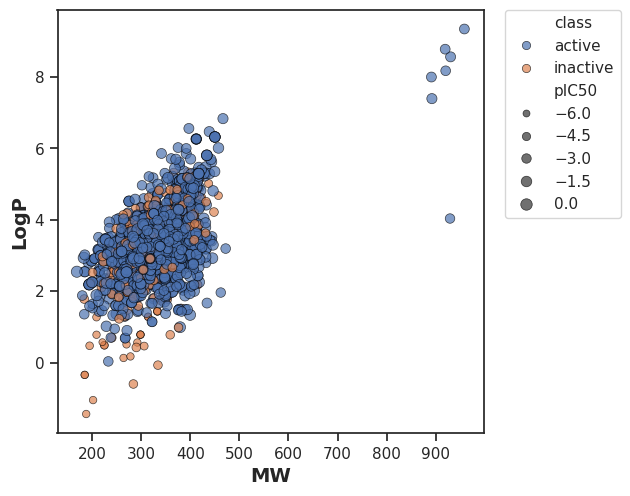

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

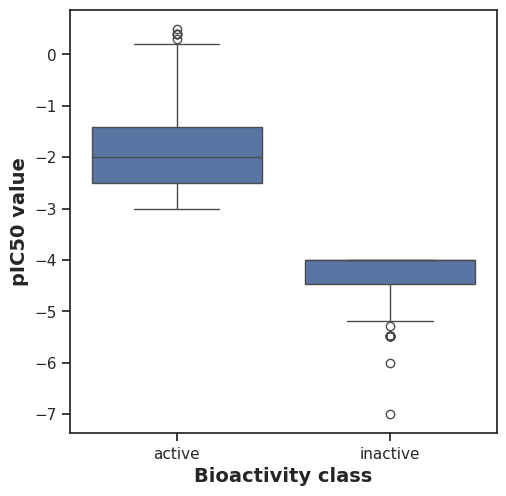

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [38]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [39]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,480320.0,5.209009e-197,0.05,Different distribution (reject H0)


#### **MW**

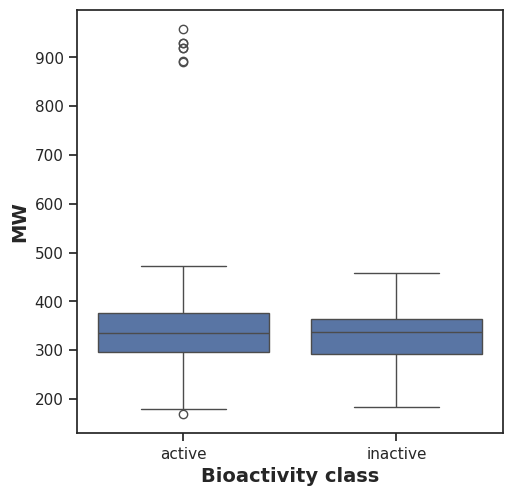

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [41]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,250063.5,0.217632,0.05,Same distribution (fail to reject H0)


#### **LogP**

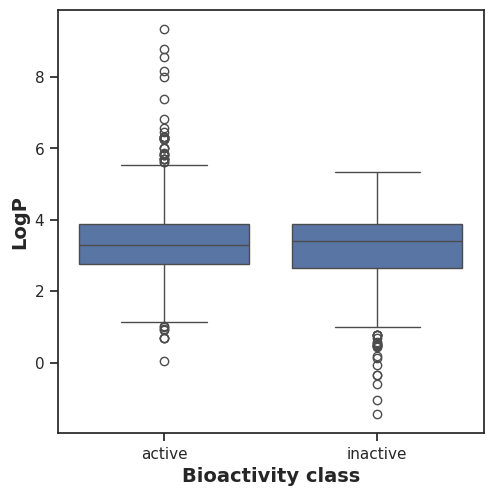

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [43]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,243029.5,0.720965,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

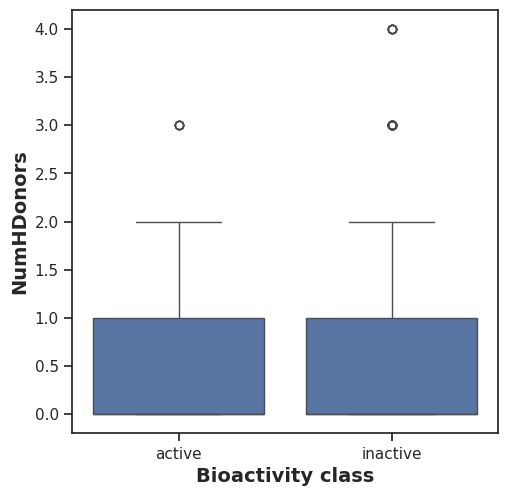

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [45]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,220141.5,0.005032,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

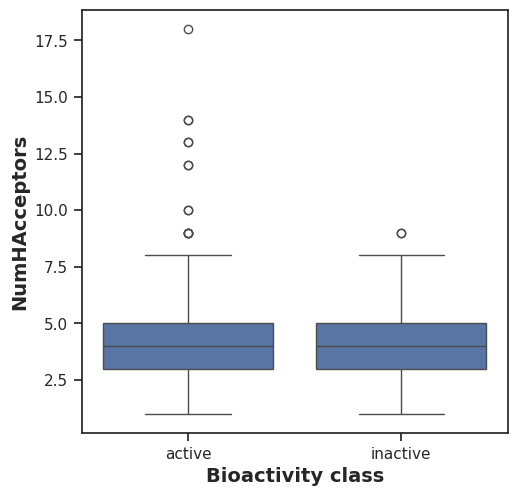

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [47]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,253355.5,0.093139,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [48]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
  adding: MgluR5_bioactivity_data_raw.csv (deflated 93%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: MgluR5_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: MgluR5_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_NumHDonors.pdf (deflated 39%)
  adding: MgluR5_02_bioactivity_data_preprocessed.csv (deflated 81%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: MgluR5_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: plot_MW.pdf (deflated 37%)
  adding: MgluR5_03_bioactivity_data_curated.csv (deflated 82%)
  adding: MgluR5_01_bioactivity_data_raw.csv (deflated 